<a href="https://colab.research.google.com/github/marciopmm/Estatistica_Ciencia_Dados/blob/main/22_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificacao com dados desbalanceados

In [ ]:
import pandas as pd
import numpy as np
import random

## Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('credit_data.csv')

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


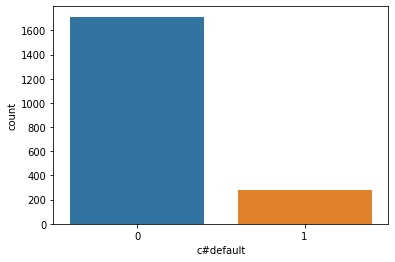

In [ ]:
import seaborn as sns
sns.countplot(dataset['c#default'])

In [ ]:
X = dataset.iloc[:, 1:4].values
X.shape

(1997, 3)

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [ ]:
X_test.shape, y_test.shape

((400, 3), (400,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [ ]:
226 / len(y_train)

0.14151534126487164

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [ ]:
57 / len(y_test)

0.1425

## Classificação com Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

In [ ]:
preview = modelo.predict(X_test)

In [ ]:
preview

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(preview, y_test)

0.92

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(preview, y_test)
cm

array([[336,  25],
       [  7,  32]])

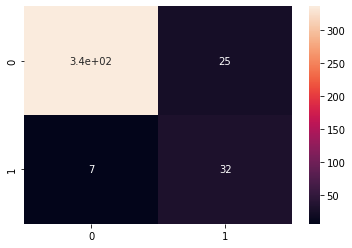

In [ ]:
sns.heatmap(cm, annot=True)

*Percentual de acerto para pessoas que pagam o empréstimo*

In [ ]:
335 / (335 + 23)

0.9357541899441341

*Percentual de acerto para pessoas que não pagam o empréstimo*

In [ ]:
(34 / (34 + 8)) * 100

80.95238095238095

In [ ]:
1000 * 19.05 / 100

190.5

*Perdas: 5000*  
*Clientes não pagadores: 1000*  
*80,95% de acertos com clientes não pagadores*  
*19,05% de erros com clientes não pagadores*

TOTAL DE CLIENTES QUE PODEM DAR PREJUÍZO POR NÃO PAGAREM O EMPRÉSTIMO: **190,5**

In [ ]:
190.5 * 5000

952500.0

TOTAL DE PREJUÍZO DO SISTEMA DE PROJEÇÃO: **952500,00**

## Subamostragem (Undersampling) - TOMEK LINKS
- https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.TomekLinks.html

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under,
                                                            y_under,
                                                            test_size=0.2,
                                                            stratify=y_under)
X_train_u.shape, X_test_u.shape

((1517, 3), (380, 3))

In [ ]:
modelo_u = GaussianNB()
modelo_u.fit(X_train_u, y_train_u)
predict_u = modelo_u.predict(X_test_u)
accuracy_score(predict_u, y_test_u)

0.9078947368421053

In [ ]:
cm_u = confusion_matrix(predict_u, y_test_u)
cm_u

array([[312,  24],
       [ 11,  33]])

In [ ]:
(312 / (312 + 24)) * 100

92.85714285714286

In [ ]:
(33 / (33 + 11)) * 100

75.0

***92,85%*** *de acertos com clientes não pagadores*  
***75,00%*** *de erros com clientes não pagadores*

**O ALGORITMO AINDA NÃO COMPENSA**

## Sobreamostragem (Oversampling) - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

- Quantidade de registros da base original
  - Pagadores = 1714
  - Não Pagadores = 283
- Quantidade de registros da base com _oversampling_
  - Pagadores = 1714
  - Não Pagadores = 1714

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over,
                                                            y_over,
                                                            test_size=0.2,
                                                            stratify=y_over)

In [ ]:
X_train_o.shape, X_test_o.shape

((2742, 3), (686, 3))

In [ ]:
modelo_o = GaussianNB()
modelo_o.fit(X_train_o, y_train_o)
predict_o = modelo_o.predict(X_test_o)
accuracy_score(predict_o, y_test_o)

0.9183673469387755

In [ ]:
cm_o = confusion_matrix(predict_o, y_test_o)
cm_o

array([[298,  11],
       [ 45, 332]])

In [ ]:
(298 / (298 + 11)) * 100

96.44012944983818

In [ ]:
(332 / (332 + 45)) * 100

88.06366047745358

***96,44%*** *de acertos com clientes pagadores*  
***88,06%*** *de acertos com clientes não pagadores*

Perdas: 5000  
Clientes não pagadores: 1000  
88,06% de acertos com clientes não pagadores  
11,94% de erros com clientes não pagadores

In [ ]:
1000 * (11.94 / 100)

119.39999999999999

In [ ]:
119.39 * 5000

596950.0

In [64]:
952500 - 596950

355550

-  Naive-Bayes = 952.500,00
- Undersampling => ***Não se mostrou melhor do que o Naive-Bayes***
- Oversampling = 596.950,00 
- **TOTAL = 355.550,00**

A diferença entre as técnicas nativas do Naive-Bayes e a técnica de Oversampling foi de 355.550,00.  
Isso se deve ao fato de que a maior amostragem de dados utilizando o Oversampling é mais efetivo para aumentar a efetividade do processo de aprendizado de máquina.